# Лабораторная работа по случайным лесам

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
digits = load_digits()
print cross_val_score(clf, digits.data, digits.target, cv=10).mean()

0.8303337234738853


In [17]:
from sklearn.ensemble import BaggingClassifier
bclf = BaggingClassifier(n_estimators = 100)
print cross_val_score(bclf, digits.data, digits.target, cv=10).mean()

/home/messimm/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9232110769914167


In [25]:
bclf2 = BaggingClassifier(n_estimators = 100, max_features = 8)
print cross_val_score(bclf2, digits.data, digits.target, cv=10).mean()

0.9360886503577281


In [40]:
clf2 = DecisionTreeClassifier(max_features = "sqrt")
print cross_val_score(clf2, digits.data, digits.target, cv=10).mean()

0.760344264330987


In [42]:
test = BaggingClassifier(n_estimators = 100, base_estimator = DecisionTreeClassifier(max_features = "sqrt"))
print cross_val_score(test, digits.data, digits.target, cv=10).mean()

0.9527667934810082


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import numpy as np
estimators_count = np.arange(5, 100, 5)
train_scores, valid_scores = validation_curve(RandomForestClassifier(), X, y, "n_estimators",estimators_count, cv=10)

Populating the interactive namespace from numpy and matplotlib


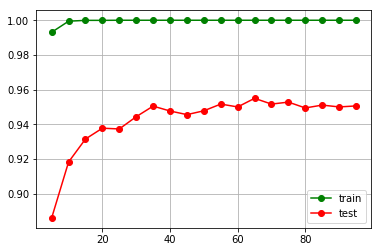

In [56]:
import matplotlib
%pylab inline
pylab.grid(True)
pylab.plot(estimators_count, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(estimators_count, valid_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.legend(loc='lower right')